In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time

df_list = []
for m in range(1,13):
    df = pd.read_csv(f'../data/interim/lichess_db_standard_rated_2020-{m:02d}.eval.blunders.csv')
    print(f"2020-{m:02d}:",len(df),"rows")
    df['Date'] = pd.to_datetime(f'2020-{m:02d}')
    df_list.append(df)

df_data = pd.concat([d for d in df_list])

df_data.head()

2020-01: 778722 rows
2020-02: 785708 rows
2020-03: 785573 rows
2020-04: 765804 rows
2020-05: 779387 rows
2020-06: 791979 rows
2020-07: 808481 rows
2020-08: 794475 rows
2020-09: 865472 rows
2020-10: 819039 rows
2020-11: 815354 rows
2020-12: 871235 rows
CPU times: user 11.3 s, sys: 762 ms, total: 12.1 s
Wall time: 12.1 s


,Move,FEN,Turn,Elo,TimeControl,ElapsedSeconds,Date
0,Bc3,r1b2rk1/pp3pbp/6p1/2pN4/2Pqp3/8/P1RBBnPP/1Q3RK...,20,1581,300+3,201.0,2020-01-01
1,Nf2+,r1b2rk1/pp3pbp/6p1/2pN4/2Pqp3/2B4n/P1R1B1PP/1Q...,21,1595,300+3,16.0,2020-01-01
2,Kg1,r1b2rk1/pp3pbp/6p1/2pN4/2Pqp3/2B5/P1R1BnPP/1Q3...,22,1581,300+3,160.0,2020-01-01
3,Nf2+,r1b2rk1/pp3pbp/6p1/2pN4/2Pqp3/2B4n/P1R1B1PP/1Q...,23,1595,300+3,17.0,2020-01-01
4,Bxe4,rn1qkb1r/ppp1pppp/5n2/5bN1/4P3/8/PPP2PPP/RNBQK...,5,1496,60+0,58.0,2020-01-01


# Explore by Elo

In [ ]:
grouped_by_elo = df_data.groupby( pd.cut(df_data['Elo'], np.arange(600, 3000, 200)) )
grouped_by_elo.size()

In [ ]:
for low_thr in range(600,2600,200):
    vc = grouped_by_elo.get_group(pd.Interval(low_thr, low_thr+200, closed='right')).value_counts(['Move', 'FEN'])
    #with pd.option_context('display.max_rows', 8):
    print(f"Elo: ({low_thr},{low_thr+200}]")
    print(vc[vc>1].head(5))
    print("---")

# Explore by Date

In [ ]:
grouped_by_elo = df_data.groupby( [pd.cut(df_data['Elo'], np.arange(600, 3000, 200)),'Date'] )
grouped_by_elo.size()

In [ ]:
for low_thr in [1600]:#range(600,2600,200):
    for date in pd.date_range(start='2020-01', periods=12, freq=pd.offsets.MonthBegin()):
        vc = grouped_by_elo.get_group((pd.Interval(low_thr, low_thr+200, closed='right'),date)).value_counts(['Move', 'FEN'])
        print(f"Date: {date}. Elo: ({low_thr},{low_thr+200}]")
        print(vc[vc>1].head(5))
    print("---")

# Explore by plots

In [3]:
%%time

vc = df_data.value_counts(['Move', 'FEN'])
vc_gt400 = vc[vc>400]

CPU times: user 40.7 s, sys: 406 ms, total: 41.1 s
Wall time: 41 s


<AxesSubplot:xlabel='Move,FEN'>

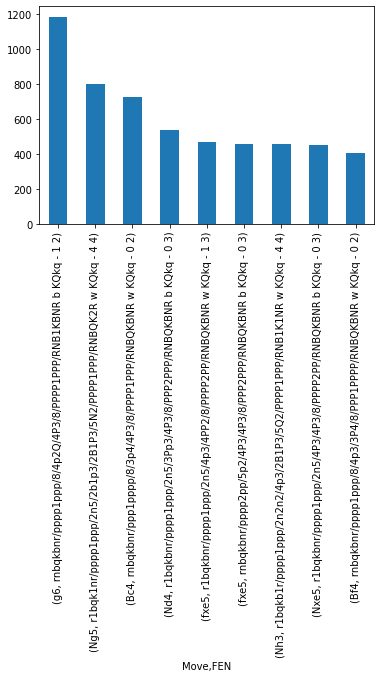

In [4]:
vc_gt400.plot(kind='bar') #TODO: change xaxis labels to move only

In [ ]:
#TODO: include FEN
s = df_data.groupby(['Date','Move']).size().sort_values(ascending=False).to_frame('size')
s = s.reset_index().set_index('Date').sort_index()

data_dict = {}
for move, group in s[s['size']>5000].groupby('Move'):
    data_dict[move] = {'date': [], 'size': []}
    data_dict[move]['date'] = [t.to_pydatetime() for t in group.index]
    data_dict[move]['size'] = group['size'].to_list()
    #plt.plot(x,y, label=move)

sorted_data = sorted(data_dict.items(), key = lambda kv:data_dict[kv[0]]['size'][-1], reverse=True)

for row in sorted_data:
    move = row[0]
    x = row[1]['date']
    y = row[1]['size']
    plt.plot(x,y, label=move)

plt.legend(loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()